In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class, vari_short_timescale
import gPhoton
from download_isochrone import load_isochrone
from extinction import add_colors_and_abs_mag
import plotly.graph_objects as go
from simbad_download import fetch_catalog_id
import pyvo as vo

from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from download_lightcurves import download_dr3_lightcurve

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
CLUSTER_NAME: str = 'NGC 2506'

In [3]:
sources = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [4]:
bss_candidates = clustered[clustered['BP-RP']<np.min(isochrone[:100, 0])]
yss_candidates = clustered[(clustered['BP-RP']<1) & (clustered['BP-RP']>0.875) &
                           (clustered['G_abs']<1)]

bss_candidates = add_colors_and_abs_mag(bss_candidates)
yss_candidates = add_colors_and_abs_mag(yss_candidates)

/home/maya/Workspace/gaia-blue/extinction.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['BP_error'] = (2.5/(np.log(10)*sources['phot_bp_mean_flux_over_error'])).astype(np.float32)
/home/maya/Workspace/gaia-blue/extinction.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['RP_error'] = (2.5/(np.log(10)*sources['phot_rp_mean_flux_over_error'])).astype(np.float32)
/home/maya/Workspace/gaia-blue/extinction.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [5]:
TO_COLOR = np.min(isochrone[:100, 0])

In [6]:
bss_candidates = clustered[clustered['BP-RP']<=TO_COLOR]

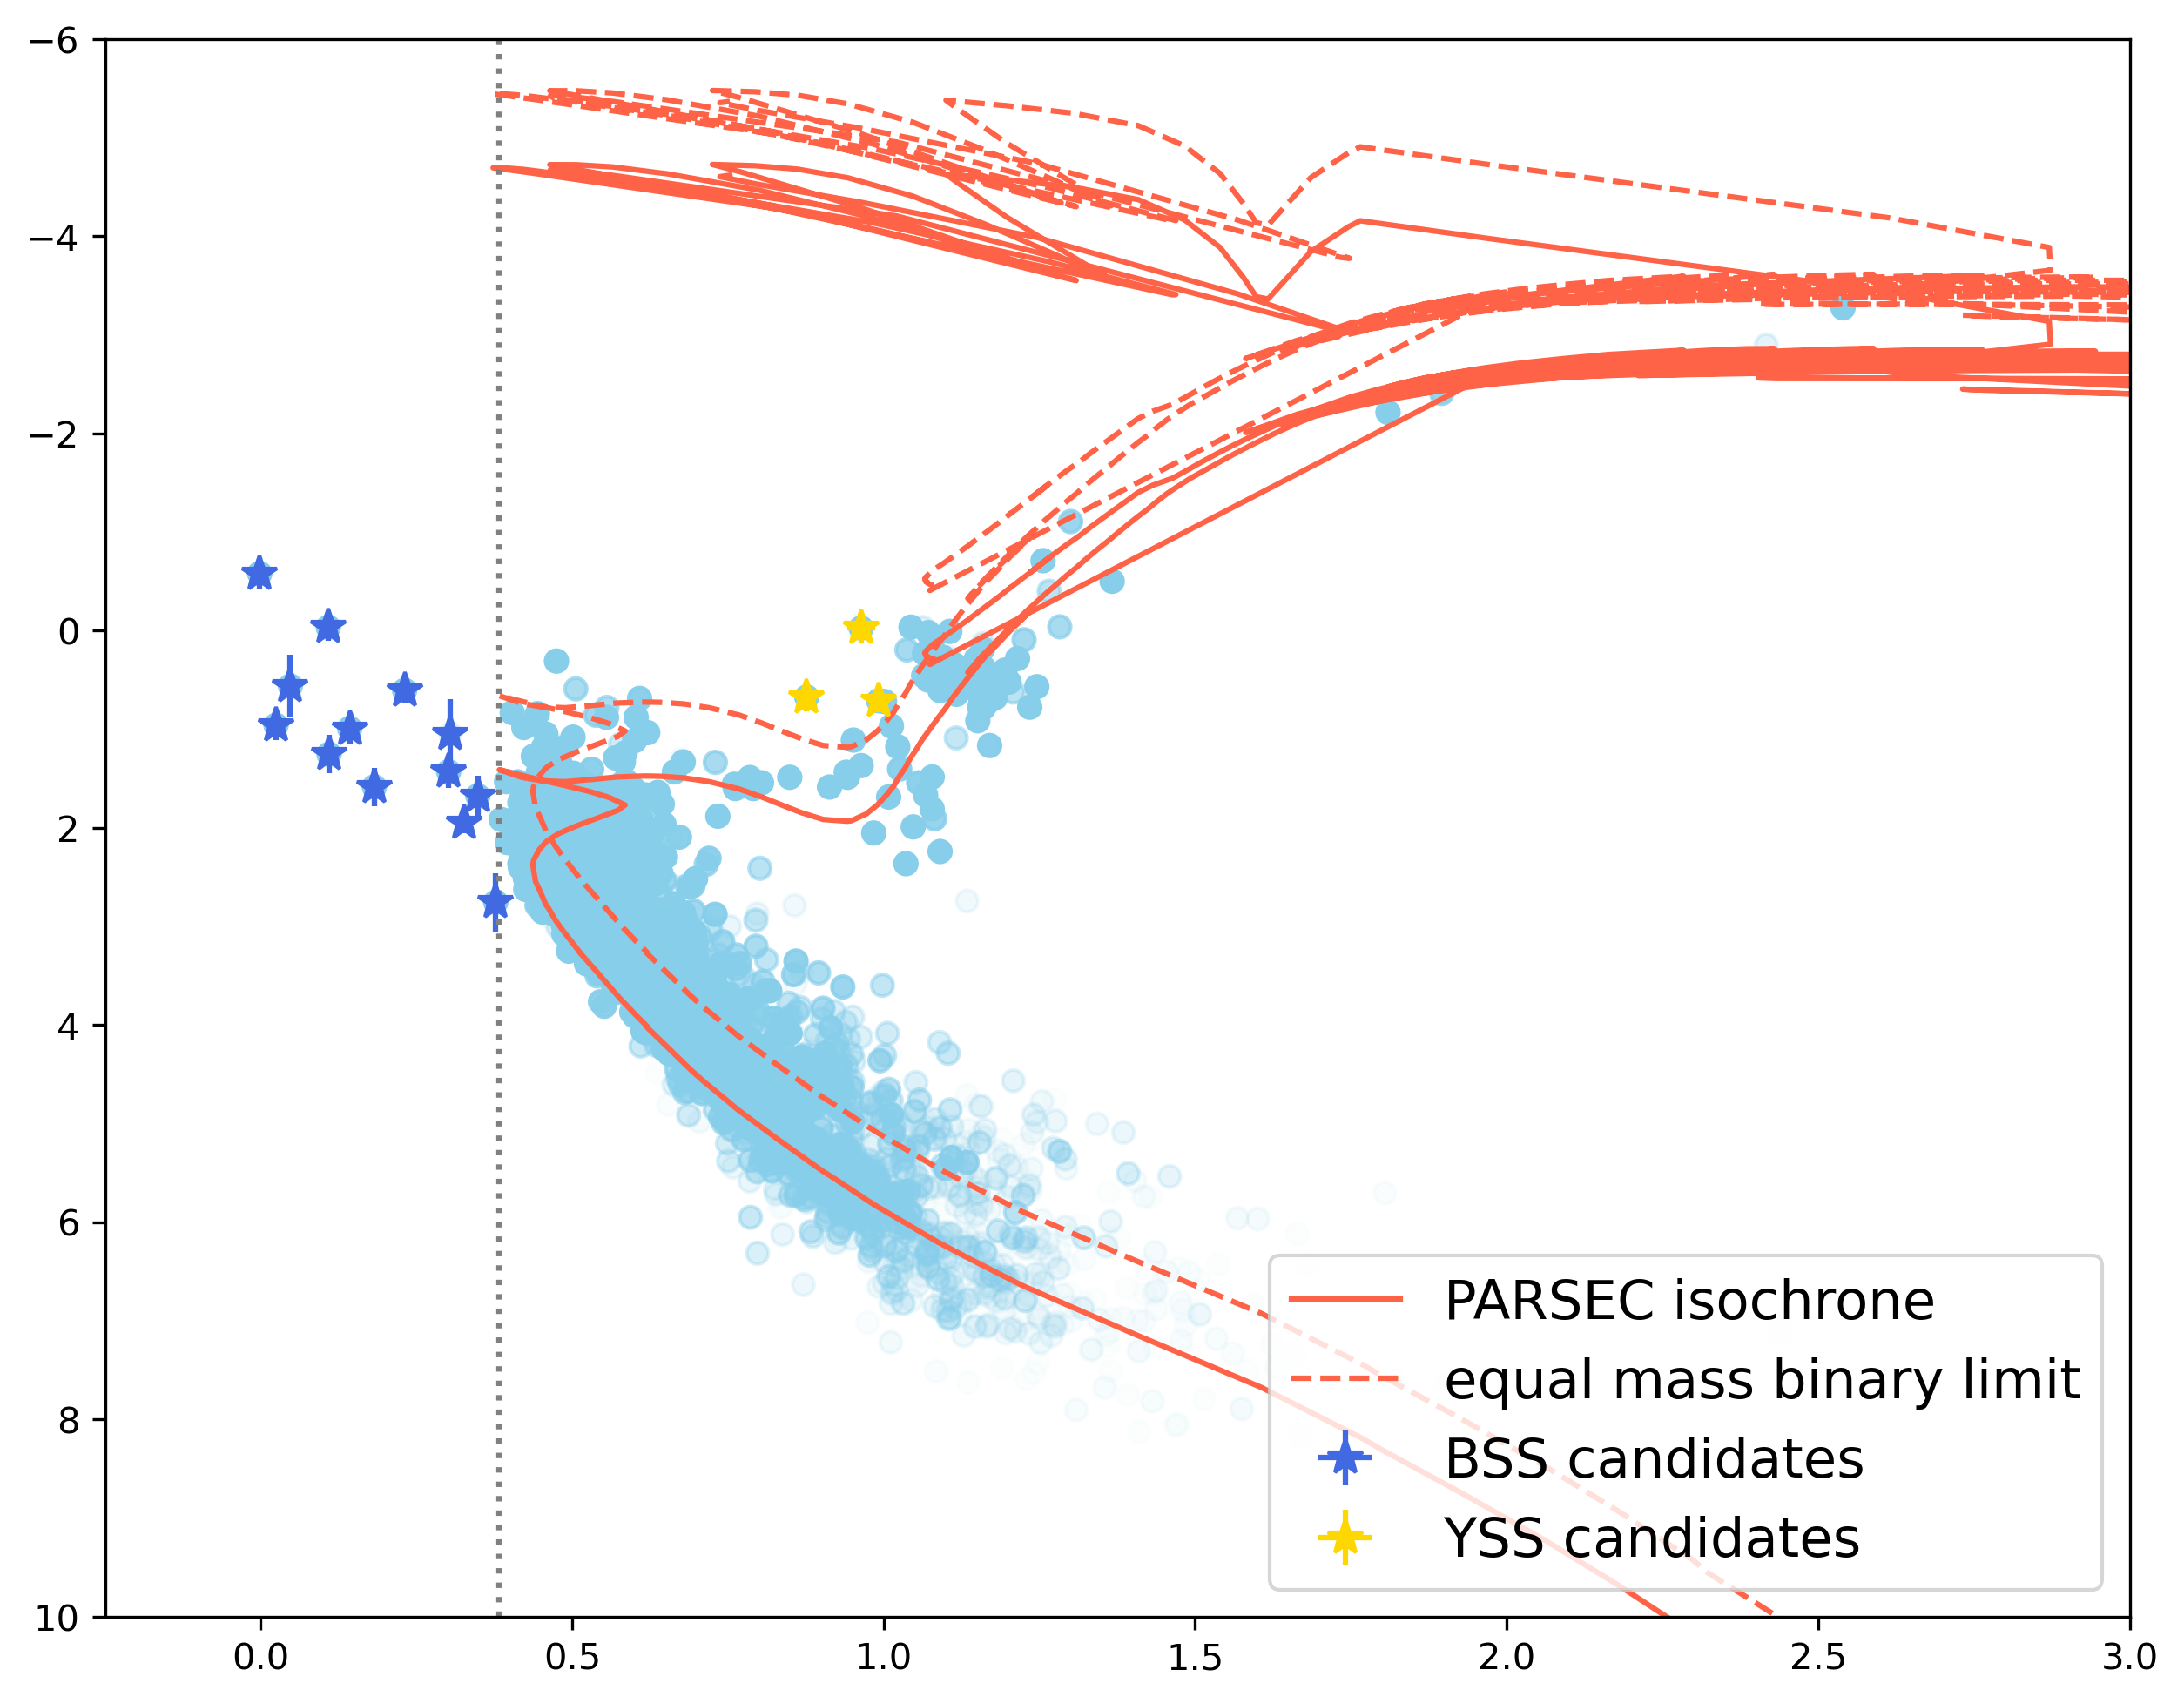

In [7]:
plt.figure(figsize=(10, 8), dpi=300)
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=np.min(isochrone[:100, 0]), color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.gca().set_xlim(-.25, 3.);
plt.gca().set_ylim(10, -6);

# BSS variability

In [8]:
bss_candidates = add_colors_and_abs_mag(bss_candidates).drop_duplicates(subset=['source_id'])

/home/maya/Workspace/gaia-blue/extinction.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['BP_error'] = (2.5/(np.log(10)*sources['phot_bp_mean_flux_over_error'])).astype(np.float32)
/home/maya/Workspace/gaia-blue/extinction.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sources['RP_error'] = (2.5/(np.log(10)*sources['phot_rp_mean_flux_over_error'])).astype(np.float32)
/home/maya/Workspace/gaia-blue/extinction.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [9]:
bss_candidates.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences
288,5988,1636148068921376768,Gaia DR3 3038042784664224000,3038042784664224000,1746673218,2016.0,120.112966,0.018268,-10.766476,0.014132,...,0.196590,0.116312,0.075045,0.182371,0.001461,1.583600,0.194587,-0.008676,50,0.96
395,6217,1636148068921376768,Gaia DR3 3038043746737021440,3038043746737021440,535896888,2016.0,120.027330,0.013675,-10.810190,0.010564,...,0.000000,0.000000,0.000000,0.108456,0.000845,-0.034426,0.137732,-0.008971,50,1.00
398,6221,1636148068921376768,Gaia DR3 3038043776795821312,3038043776795821312,1274429676,2016.0,120.038267,0.015725,-10.803787,0.011834,...,0.000000,0.000000,0.000000,-0.001622,0.000736,-0.579249,0.149321,-0.004180,50,1.00
448,6306,1636148068921376768,Gaia DR3 3038043987255167104,3038043987255167104,582342418,2016.0,120.029202,0.032565,-10.786453,0.021816,...,0.147442,0.087234,0.056284,0.377230,0.003613,2.754259,0.293605,-0.008686,50,1.00
535,6466,1636148068921376768,Gaia DR3 3038044674449987584,3038044674449987584,1736225219,2016.0,119.991067,0.021463,-10.788991,0.014635,...,0.196590,0.116312,0.075045,0.348486,0.011382,1.675396,0.205053,0.003495,50,1.00


In [10]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [11]:
bss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences
448,6306,1636148068921376768,Gaia DR3 3038043987255167104,3038043987255167104,582342418,2016.0,120.029202,0.032565,-10.786453,0.021816,...,0.147442,0.087234,0.056284,0.377230,0.003613,2.754259,0.293605,-0.008686,50,1.0
535,6466,1636148068921376768,Gaia DR3 3038044674449987584,3038044674449987584,1736225219,2016.0,119.991067,0.021463,-10.788991,0.014635,...,0.196590,0.116312,0.075045,0.348486,0.011382,1.675396,0.205053,0.003495,50,1.0
638,6610,1636148068921376768,Gaia DR3 3038044880608396672,3038044880608396672,1454705278,2016.0,119.992070,0.013726,-10.764990,0.009765,...,0.245737,0.145390,0.093806,0.230982,0.002087,0.605137,0.128395,-0.002880,50,1.0
666,6659,1636148068921376768,Gaia DR3 3038045052407110656,3038045052407110656,204447419,2016.0,119.973479,0.018076,-10.763329,0.012437,...,0.245737,0.145390,0.093806,0.301653,0.012662,1.429772,0.166357,0.004123,50,1.0
881,7050,1636148068921376768,Gaia DR3 3038046358077125248,3038046358077125248,1416297946,2016.0,119.999029,0.016248,-10.754053,0.011672,...,0.245737,0.145390,0.093806,0.142891,0.001244,0.990615,0.164013,-0.004929,50,1.0


In [12]:
bss_classes = vari_class(bss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [13]:
bss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,3038043987255167104,false,false,false,false,false,false,false,false,false,false,false
1,3038044674449987584,false,false,false,false,false,false,false,false,false,false,false
2,3038044880608396672,false,false,false,true,false,false,false,false,false,false,false
3,3038045052407110656,false,false,false,true,false,false,false,true,false,false,false
4,3038046358077125248,false,false,false,true,false,false,false,false,false,false,false


In [14]:
vari_short_timescale(bss_classes.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


,solution_id,source_id,amplitude_estimate,number_of_fov_transits,mean_of_fov_abbe_values,variogram_num_points,variogram_char_timescales,variogram_values,frequency
0,375316653866487564,3038044880608396672,0.036079,40,0.947542,1,(0.25),(5.300400775599258E-4),37.50486
1,375316653866487564,3038045052407110656,0.176513,44,0.854917,1,(0.074),(0.011941321418967777),10.85446
2,375316653866487564,3038046358077125248,0.043513,40,0.736016,1,(0.3236),(0.001050232371313924),8.66466


In [15]:
def mag_error(flux_over_error: float) -> float:
    return 1/(flux_over_error*2.5/np.log(10))


def gaia_time_to_bjd(tcb_time: float) -> float:
    return tcb_time + 2455197.5

def load_dr3_lightcurve(lc1: pd.DataFrame) -> pd.DataFrame:
    lc1['mag_error'] = mag_error(lc1.flux_error.values)
    lc1['time'] = gaia_time_to_bjd(lc1['time'])
    return lc1
    
def get_gaia_bands(lc1: pd.DataFrame):
    lc_dict = {}
    for band in ['G', 'BP', 'RP']:
        lc_dict[band] = lc1[lc1.band==band]
    return lc_dict

def plot(lcs: pd.DataFrame, band: str):
    lc = lcs[band]
    plt.figure(figsize=(10, 7))
    plt.errorbar(lc.time, lc.mag, yerr=lc.mag_error, fmt='o', color=COLORS[band], label=band);
    plt.gca().set_xlabel('time [JD]', fontsize=16);
    plt.gca().set_ylabel('mag', fontsize=16);
    plt.legend(fontsize=16);

COLORS = {
    'G': 'black',
    'BP': 'royalblue',
    'RP': 'indianred'
}

In [16]:
lc = get_gaia_bands(load_dr3_lightcurve(download_dr3_lightcurve([3038044674449987584])[0]))

len['EPOCH_PHOTOMETRY-Gaia DR3 3038044674449987584.xml'] lightcurves found.


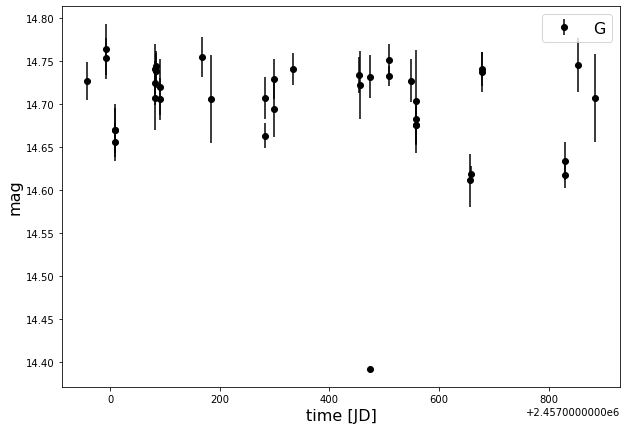

In [17]:
plot(lc, 'G')

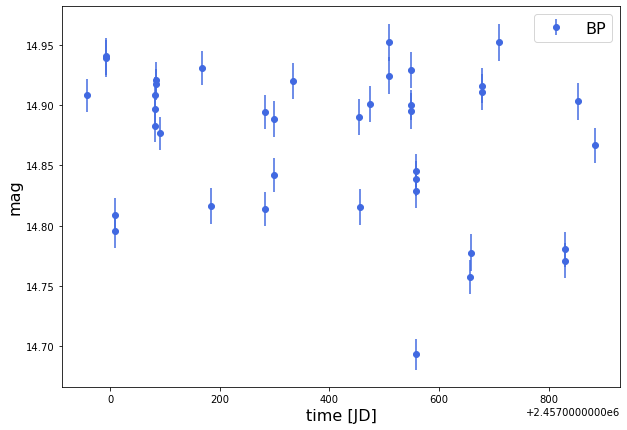

In [18]:
plot(lc, 'BP')

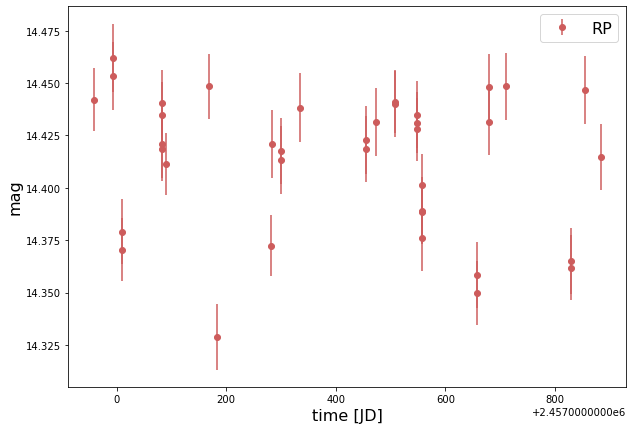

In [19]:
plot(lc, 'RP')

In [20]:
np.any(bss_candidates.non_single_star)

False

In [21]:
bss_candidates[bss_candidates.ruwe>1.4][['source_id', 'has_epoch_photometry', 'ruwe', 'excess', 'occurences']]

,source_id,has_epoch_photometry,ruwe,excess,occurences


In [22]:
np.any(bss_candidates.has_epoch_rv)

False

In [23]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude[['source_id', 'radial_velocity', 'rv_amplitude_robust', 'radial_velocity_error']]

,source_id,radial_velocity,rv_amplitude_robust,radial_velocity_error


In [24]:
for _, bss in bss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

3038043987255167104: 120.02920189695448, -10.786453164218424:
NUV: 217.0s (raw) in 2 exposures.
    [ 819799889.995, 819800003.995 ], 114.000 seconds
    [ 856441393.995, 856441496.995 ], 103.000 seconds
FUV: 217.0s (raw) in 2 exposures.
    [ 819799889.995, 819800003.995 ], 114.000 seconds
    [ 856441393.995, 856441496.995 ], 103.000 seconds

3038044674449987584: 119.9910670252292, -10.78899099947551:
NUV: 217.0s (raw) in 2 exposures.
    [ 819799889.995, 819800003.995 ], 114.000 seconds
    [ 856441393.995, 856441496.995 ], 103.000 seconds
FUV: 217.0s (raw) in 2 exposures.
    [ 819799889.995, 819800003.995 ], 114.000 seconds
    [ 856441393.995, 856441496.995 ], 103.000 seconds

3038044880608396672: 119.99207046748434, -10.764989834159636:
NUV: 217.0s (raw) in 2 exposures.
    [ 819799889.995, 819800003.995 ], 114.000 seconds
    [ 856441393.995, 856441496.995 ], 103.000 seconds
FUV: 217.0s (raw) in 2 exposures.
    [ 819799889.995, 819800003.995 ], 114.000 seconds
    [ 856441393.

# YSS variability

In [25]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE'].drop_duplicates(subset=['source_id'])

In [26]:
yss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences


In [27]:
yss_var.has_epoch_photometry

Series([], Name: has_epoch_photometry, dtype: bool)

In [28]:
for _, bss in yss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

In [29]:
yss_candidates.non_single_star

463    0
561    0
610    0
Name: non_single_star, dtype: int64

In [30]:
yss_candidates.ruwe

463    0.971244
561    1.116719
610    0.936423
Name: ruwe, dtype: float64

In [31]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude[['source_id', 'rv_amplitude_robust', 'radial_velocity_error', 'occurences']]

,source_id,rv_amplitude_robust,radial_velocity_error,occurences


In [32]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [34]:
bss_candidates[bss_candidates.occurences>=0.84].occurences.value_counts()

1.00    9
0.96    1
0.92    1
Name: occurences, dtype: int64

In [35]:
len(bss_candidates)

13

In [36]:
len(yss_candidates)

3

In [37]:
yss_candidates.occurences.value_counts()

1.0    3
Name: occurences, dtype: int64

In [38]:
len(bss_candidates.drop_duplicates(subset=['source_id']))

13

In [39]:
len(yss_candidates)

3

In [40]:
bss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')